# Estilos de Texto
La mayoría de librerías me permiten personalizar el texto que utilizo en mis graficos. Esto incluye Título, Ejes, y Ticks. 
- Fuente, Tamaño, Color, Estilo (negritas, cursiva)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 

# Pandas

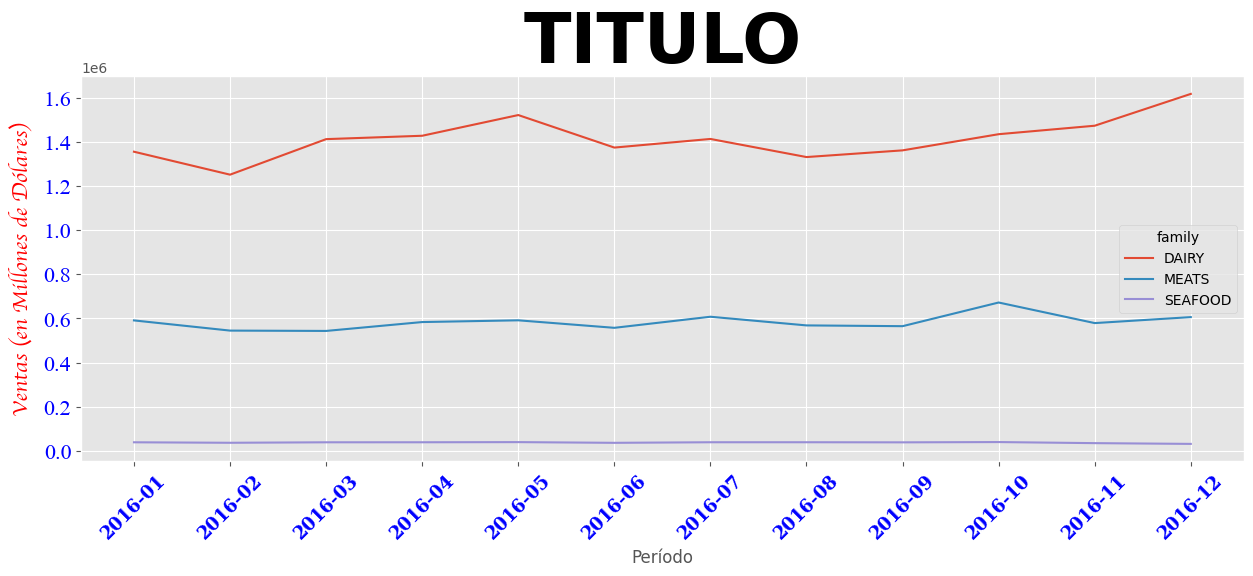

In [57]:
plt.style.use(
    'ggplot' 
)
ax = df.plot.line(
    figsize=(15, 5),
    title='Ventas de 3 Tipos de Productos por Año'
)

ax.set_title(
    'TITULO',
    fontdict={
        'size': 50,
        'weight': 'bold'
    }
)

ax.set_xlabel('Período')

# Cada uno de los metodos para configurar texto, admite un diccionario llamado fontdict
# Lista completa de posibles configuraciones: https://matplotlib.org/stable/tutorials/text/text_props.html
ax.set_ylabel(
    'Ventas (en Millones de Dólares)',
    fontdict={
        'name': 'Helvetica',
        'style': 'italic',
        'color': 'red',
        'weight': 'bold',
        'size': 16,
        'family': 'cursive'
    }
)

ax.set_xticks(np.arange(0, len(df))) 
ax.set_xticklabels(
    df.index.values, 
    rotation=45,
    fontdict={
        'color':  'blue',
        'weight': 'bold',
        'size': 13,
        'family': 'serif'
    }
)

# Metodo GLOBAL
# Me sirve para cambiar estilos sin definir los labels como tal
plt.yticks(
    fontsize=16,
    color='blue',
    name='Times New Roman'
)

plt.show()

# Seaborn

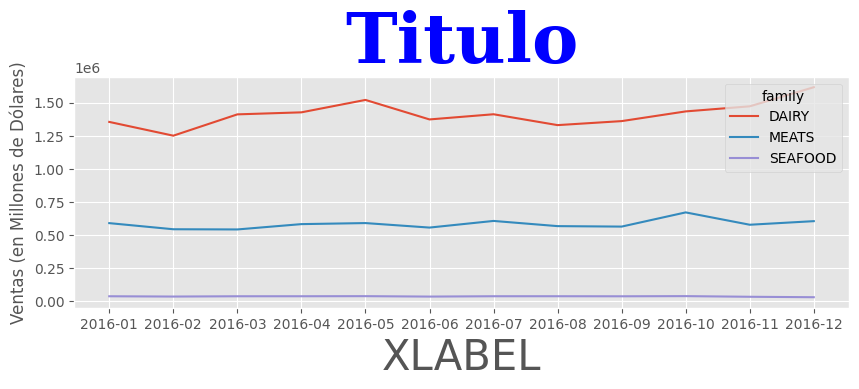

In [59]:
plt.figure(
    figsize=(10, 3)
)

g = sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family'
)

g.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

# Misma logica que Pandas
g.set_title(
    'Titulo',
    fontdict={
        'color':  'blue',
        'weight': 'bold',
        'size': 50,
        'family': 'serif'
    }
)

g.set_xlabel(
    'XLABEL',
    fontdict={
        'size': 30
    }
)

plt.show()

# Plotly

In [24]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, 
    height=500,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "x": "Periodo",
        "sales": "Ventas por año (en millones de $)",
        "family": "Tipo de Producto"
    }
)

# Configuraciones de TEXTO globales para el gráfico
# https://plotly.com/python/figure-labels/#global-and-local-font-specification
fig.update_layout( 
    font_family="Courier New", # Para todo el gráfico. Puede ser sobreescrita por otras configuraciones
    font_color="blue", # Para todo el gráfico. Puede ser sobreescrita por otras configuraciones
    title_font_family="Times New Roman", # Solo del título del grafico
    title_font_color="red", # Solo del titulo del grafico
    legend_title_font_color="green", # Solo del titulo de la leyenda
    legend_font_color='black' # Del resto del texto de la leyenda
)

# Configuraciones de TEXTO locales a los Ejes y a los Ticks
# https://plotly.com/python/figure-labels/#global-and-local-font-specification
fig.update_xaxes(
    title_font_family="Arial", # Solo el titulo del Eje
    title_font_color='black', # Solo el titulo del Eje
    title_font_size=26, # Solo el titulo del Eje
    tickangle=45,
    tickmode='array',
    tickvals=df.index.values,
    tickfont={ # Configuraciones de fuente para los ticks
        'family': 'Rockwell', 
        'color': 'brown', 
        'size': 10
    }
)

fig.update_yaxes(
    nticks=20
)

fig.show()